<a href="https://colab.research.google.com/github/sothearith-min/Personal-EDA-project-/blob/main/Insurance_claim_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import some important libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read Data

In [ ]:
insurance = pd.read_csv("insurance_data.csv")

Check for first 5 rows

In [ ]:
insurance.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


Shape of data

In [ ]:
insurance.shape

(1340, 11)

Check some importance info

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
insurance.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [ ]:
insurance.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

**Start cleaning** 

Drop Nas

In [ ]:
insurance = insurance.dropna()

Duplicate ?

In [ ]:
dup = insurance.duplicated()
print(dup.sum())

0


In [ ]:
for column in insurance.columns:
    if insurance[column].dtype=='object':
        print()
        print(column)
        print(insurance[column].unique())


gender
['male' 'female']

diabetic
['Yes' 'No']

smoker
['No' 'Yes']

region
['southeast' 'northwest' 'southwest' 'northeast']


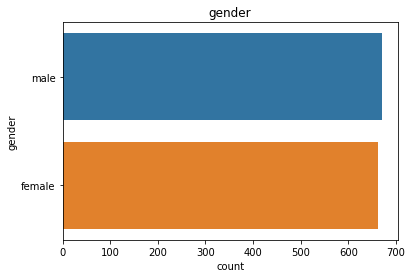

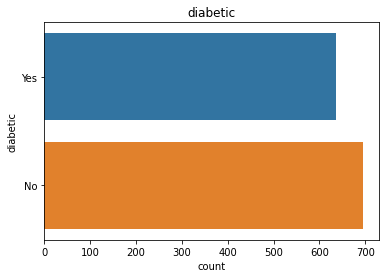

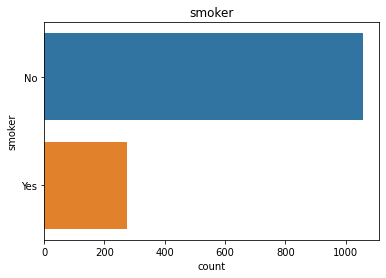

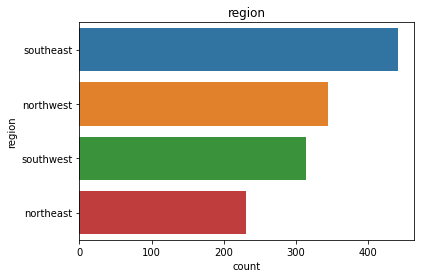

In [ ]:
for col in insurance.select_dtypes(include='object'):
    sns.countplot(y=col, data=insurance, orient='h')
    plt.title(col)
    plt.show()

Check regions where do they from 

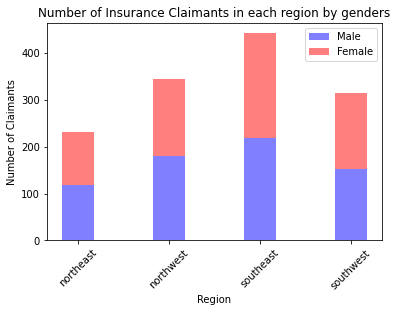

In [ ]:
male = insurance[insurance['gender'] == 'male'].groupby(['region']).size().reset_index(name='male_counts')
female = insurance[insurance['gender'] == 'female'].groupby(['region']).size().reset_index(name='female_counts')
data = pd.merge(male, female, on='region')
fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(data['region'], data['male_counts'], bar_width, color='blue', alpha=0.5)
ax.bar(data['region'], data['female_counts'], bar_width, color='red', alpha=0.5, bottom=data['male_counts'])

ax.set_title('Number of Insurance Claimants in each region by genders')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Claimants')

plt.xticks(range(len(data['region'])), data['region'], rotation=45)

plt.legend(['Male', 'Female'])

plt.show()

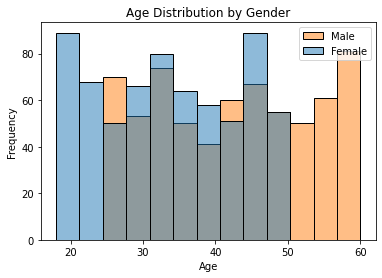

In [ ]:
sns.histplot(x='age', hue='gender', data=insurance, kde=False)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(['Male', 'Female'])

plt.show()

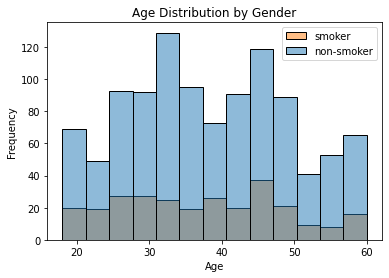

In [ ]:
sns.histplot(x='age', hue='smoker', data=insurance, kde=False)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['smoker', 'non-smoker'])

plt.show()

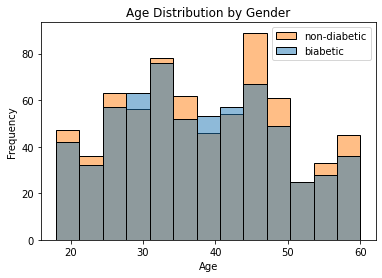

In [ ]:
sns.histplot(x='age', hue='diabetic', data=insurance, kde=False)

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(['non-diabetic', 'biabetic'])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


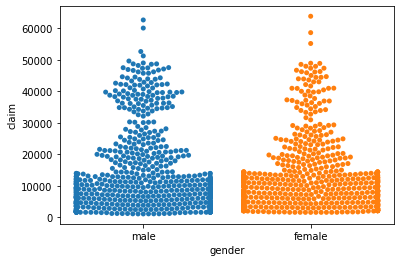

In [ ]:
sns.swarmplot(x='gender', y='claim', data=insurance)

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


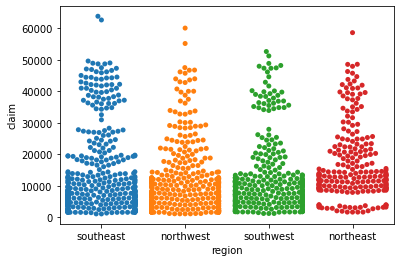

In [ ]:
sns.swarmplot(x='region', y='claim', data=insurance)

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


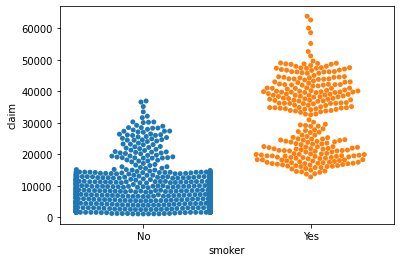

In [ ]:
sns.swarmplot(x='smoker', y='claim', data=insurance)

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


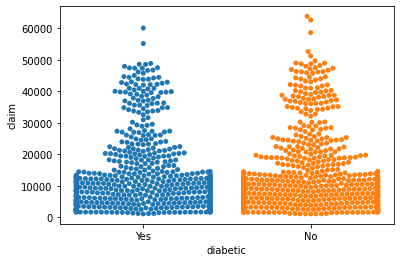

In [ ]:
sns.swarmplot(x='diabetic', y='claim', data=insurance)

plt.show()

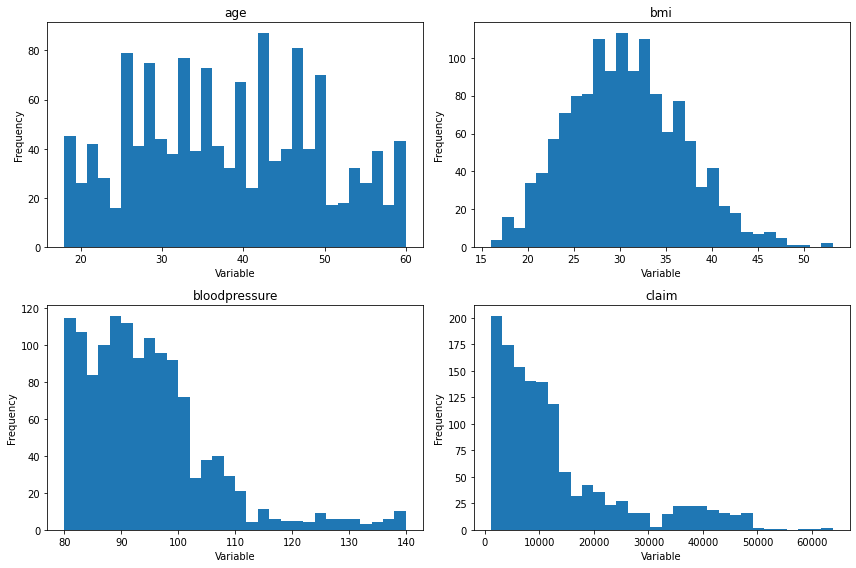

In [ ]:
variables = ['age', 'bmi', 'bloodpressure', 'claim']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.ravel()

for i, variable in enumerate(variables):
    ax[i].hist(insurance[variable], bins=30)
    ax[i].set_xlabel('Variable')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(variable)

plt.tight_layout()
plt.show()

Check for variable relationship

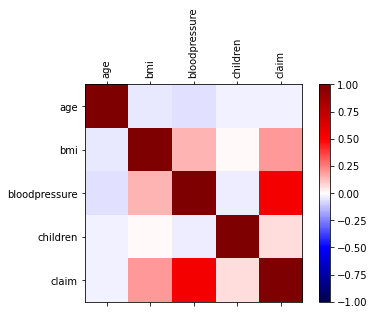

In [ ]:
insur_cor = insurance[["age","bmi","bloodpressure","children","claim"]]
corr = insur_cor.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(insur_cor.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(insur_cor.columns)
ax.set_yticklabels(insur_cor.columns)
plt.show()

Scatter plot

In [ ]:
use_insurance = insurance.drop(columns = ["PatientID","index"])

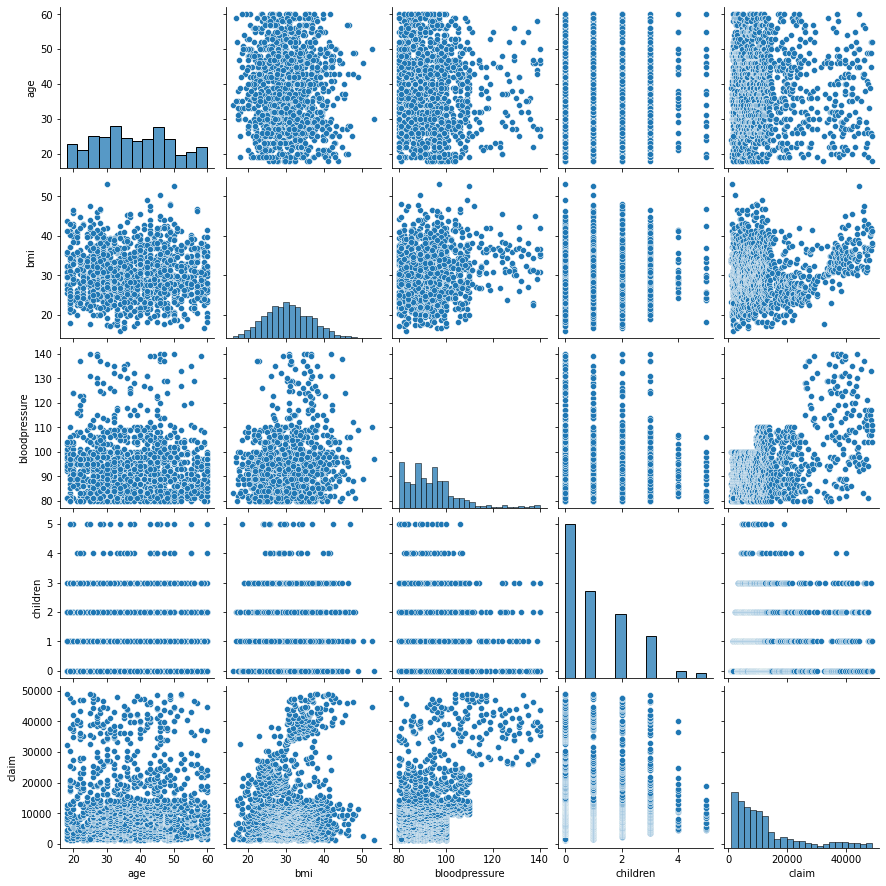

In [ ]:
sns.pairplot(use_insurance)
plt.show()

**START MODELING**

split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
def remove_outliers_z_score(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    return [y for y, z in zip(data, z_scores) if np.abs(z) < threshold]
claim_new = remove_outliers_z_score(use_insurance["claim"])
use_insurance = use_insurance[use_insurance["claim"].isin(claim_new)]

In [ ]:
use_insur = pd.get_dummies(use_insurance, columns= use_insurance.select_dtypes(include='object').columns)

In [ ]:
use_insur

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
7,19.0,41.1,100,0,1146.80,0,1,1,0,1,0,0,1,0,0
8,20.0,43.0,86,0,1149.40,0,1,1,0,1,0,0,1,0,0
9,30.0,53.1,97,0,1163.46,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,45.0,42.1,117,1,48675.52,0,1,1,0,0,1,0,0,1,0
1329,52.0,37.7,109,0,48824.45,1,0,0,1,0,1,0,0,0,1
1330,25.0,38.1,111,0,48885.14,1,0,1,0,0,1,0,0,1,0
1331,18.0,41.1,104,1,48970.25,0,1,1,0,0,1,0,0,1,0


In [ ]:
X = use_insur.drop(columns=["claim"])
y = use_insur["claim"]

In [ ]:
scaler = StandardScaler()
X_s =scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s ,y, test_size=0.2, random_state=0)

**Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = regression.predict(X_test)

In [ ]:
y_pred_linear

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_linear = r2_score(y_test,y_pred_linear)
r2_linear

0.7612660810880187

In [ ]:
r2_ajust_linear = 1 - (1-r2_linear)*(len(y)-1)/(len(y)-X.shape[1]-1)
r2_ajust_linear

0.7587147262294174

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear

38274140.433161475

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree = tree.predict(X_test)

In [ ]:
r2_tree = r2_score(y_test,y_pred_tree)
r2_tree

0.688408333472074

In [ ]:
r2_ajust_tree = 1 - (1-r2_tree)*(len(y)-1)/(len(y)-X.shape[1]-1)
r2_ajust_tree

0.685078346196203

In [ ]:
mse_tree= mean_squared_error(y_test, y_pred_tree)
mse_tree

49954791.74825434

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_randomforest = random_forest.predict(X_test)

In [ ]:
r2_randomforest = r2_score(y_test, y_pred_randomforest)
r2_randomforest

0.8503274507056874

In [ ]:
r2_ajust_randomforest  = 1 - (1-r2_randomforest )*(len(y)-1)/(len(y)-X.shape[1]-1)
r2_ajust_randomforest

0.8473581375655788

In [ ]:
mse_randomforest = mean_squared_error(y_test, y_pred_randomforest)
mse_randomforest

24212982.365219824

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
r2_knn = r2_score(y_test, y_pred_knn)
r2_knn

0.7234843985062978

In [ ]:
r2_ajust_knn  = 1 - (1-r2_knn )*(len(y)-1)/(len(y)-X.shape[1]-1)
r2_ajust_knn 

0.7205292699407162

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_knn 

44331350.198427685

**Evaluation**

In [ ]:
r2 = [round(r2_linear,4),round(r2_tree,4),round(r2_randomforest,4),round(r2_knn,4)]
r2_adjust = [round(r2_ajust_linear,4),round(r2_ajust_tree,4),round(r2_ajust_randomforest,4),round(r2_ajust_knn,4)]
mse = [round(mse_linear,4),round(mse_tree,4),round(mse_randomforest,4),round(mse_knn,4)]
model = ["Linear Regression","Decision tree regressor","Radom forest regressor","K-NeighborsRegressor"]
print("Model".ljust(30), "R^2".ljust(10), "R^2 Adjust".ljust(10) , "MSE".ljust(10))
for i in range(len(model)):
    print(model[i].ljust(30), str(r2[i]).ljust(10),str(r2_adjust[i]).ljust(10) , str(mse[i]).ljust(10))

Model                          R^2        R^2 Adjust MSE       
Linear Regression              0.7613     0.7587     38274140.4332
Decision tree regressor        0.6884     0.6851     49954791.7483
Radom forest regressor         0.8476     0.846      24434694.8492
K-NeighborsRegressor           0.7235     0.7205     44331350.1984


**Random Forest Give Best Result**

Use predicted to comparw with actual *claim*

In [ ]:
useInsur_no_dummies = pd.get_dummies(use_insur).drop(use_insur.columns[use_insur.columns.str.contains('_')], axis=1)

In [ ]:
useInsur_no_dummies

In [ ]:
import pickle

# Save the model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(random_forest, file)

In [ ]:
model = pickle.load(open("model.pkl",'rb'))

In [ ]:
Check =  DataFrame(y_pred_randomforest

In [ ]:
y

0        1121.87
1        1131.51
7        1146.80
8        1149.40
9        1163.46
          ...   
1328    48675.52
1329    48824.45
1330    48885.14
1331    48970.25
1332    49577.66
Name: claim, Length: 1325, dtype: float64